In [89]:
import numpy as np
import pandas as pd
import os
import string

In [90]:
dataset=pd.read_csv("Plant_leaf_features.csv")

In [91]:
breakpoints=[1001,1050,1051,1172,1173,1228,1229,1288,1289,1391,1392,1425,1426,1499,1500,1556,1557,1606,1607,1669,1670,1712,1713,1783,1784,1845,1846,1942,1943,2019,2020,2075,2076,2135,2136,2197,2198,2237,2238,2289,2290,2337,2338,2385,2386,2446,2447,2511,2512,2590,2591,2648,2649,2687,2688,2743,2744,2799,2800,2835]

In [92]:
dataset.tail(10)

,Unnamed: 0,area,perimeter,physiological_length,physiological_width,aspect_ratio,rectangularity,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,inverse_difference_moments,entropy
1825,0,342479.0,2304.463315,707,770,0.918182,1.589557,15.506210,17.085237,21.199390,6.855948,37.809750,46.016893,22.175372,15.223038,0.997965,0.878109,2.479776
1826,0,318893.5,2194.265272,627,729,0.860082,1.433341,15.098458,16.109530,18.867147,6.083921,37.374806,43.057809,21.445969,18.313552,0.997518,0.872513,2.456003
1827,0,344560.0,2401.963753,662,802,0.825436,1.540875,16.744340,17.325535,20.332954,5.489102,38.178357,44.084759,21.128437,14.706196,0.998146,0.889736,2.422632
1828,0,229482.0,2255.665204,378,951,0.397476,1.566476,22.171785,11.406026,13.607136,4.841576,32.268995,37.277986,21.059793,10.514599,0.998194,0.937355,1.578781
1829,0,282835.5,2238.961672,458,877,0.522235,1.420140,17.723904,15.029943,17.403865,6.808238,37.109761,42.264151,22.504737,13.077302,0.997926,0.905522,2.065189
1830,0,305047.0,2197.762747,627,741,0.846154,1.523067,15.834154,14.267613,16.297883,5.479559,34.177146,38.324782,21.119348,14.892362,0.998123,0.883044,2.187782
1831,0,324403.5,2367.883464,575,789,0.728771,1.398490,17.283636,17.412776,20.452719,6.123387,39.630830,45.799385,21.248171,15.007153,0.997831,0.890741,2.335267
1832,0,196129.5,1828.780870,400,652,0.613497,1.329734,17.052200,9.424453,11.117247,4.752799,29.436136,33.498085,20.198340,7.498447,0.998586,0.927192,1.516003
1833,0,482562.0,2719.350621,768,910,0.843956,1.448270,15.324182,22.756484,27.978471,8.019591,40.678692,48.995830,23.376226,19.705433,0.998078,0.812165,3.353744
1834,0,251135.0,1935.738362,587,633,0.927330,1.479567,14.920593,12.426834,15.283236,4.506798,33.030431,39.766024,19.427997,11.745118,0.998044,0.914478,1.805111


In [93]:
dataset.head(5)

,Unnamed: 0,area,perimeter,physiological_length,physiological_width,aspect_ratio,rectangularity,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,inverse_difference_moments,entropy
0,0,232549.0,3144.089858,1180,841,1.403092,4.267402,42.508465,8.865354,11.580899,8.398964,27.800215,32.902279,27.403357,25.910622,0.996379,0.897422,1.931667
1,0,474562.5,3473.489792,1219,909,1.341034,2.334932,25.423693,23.752019,30.081827,16.240280,43.429020,53.242972,33.112202,19.731937,0.997756,0.822875,3.369693
2,0,419871.0,3987.515395,1411,1160,1.216379,3.898245,37.869439,17.470908,23.944648,13.222306,36.482656,46.329772,31.868380,22.333380,0.997727,0.846861,3.018129
3,0,435572.0,3009.041968,985,807,1.220570,1.824945,20.787226,19.343993,25.105472,14.664246,37.988880,47.365957,31.541931,20.139154,0.997820,0.840751,3.097287
4,0,238858.5,4008.541857,1494,1154,1.294627,7.217981,67.271660,11.221184,14.514543,8.780794,32.630938,39.284535,29.519376,23.323631,0.996223,0.893048,2.002692


In [94]:
type(dataset)

pandas.core.frame.DataFrame

In [95]:
maindir = r'C:\Users\parth\OneDrive\Desktop'
ds_path = maindir + "\\finaldataset"
img_files = os.listdir(ds_path)

In [96]:
target_list = []
for file in img_files:
    target_num = int(file.split(".")[0])
    flag = 0
    i = 0 
    for i in range(0,len(breakpoints),2):
        if((target_num >= breakpoints[i]) and (target_num <= breakpoints[i+1])):
            flag = 1
            break
    if(flag==1):
        target = int((i/2))
        target_list.append(target)

In [97]:
y = np.array(target_list)
y

array([ 0,  0,  0, ..., 29, 29, 29])

In [98]:
y.shape

(1835,)

In [99]:
X = dataset.iloc[:,1:]
X.head(5)

,area,perimeter,physiological_length,physiological_width,aspect_ratio,rectangularity,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,inverse_difference_moments,entropy
0,232549.0,3144.089858,1180,841,1.403092,4.267402,42.508465,8.865354,11.580899,8.398964,27.800215,32.902279,27.403357,25.910622,0.996379,0.897422,1.931667
1,474562.5,3473.489792,1219,909,1.341034,2.334932,25.423693,23.752019,30.081827,16.240280,43.429020,53.242972,33.112202,19.731937,0.997756,0.822875,3.369693
2,419871.0,3987.515395,1411,1160,1.216379,3.898245,37.869439,17.470908,23.944648,13.222306,36.482656,46.329772,31.868380,22.333380,0.997727,0.846861,3.018129
3,435572.0,3009.041968,985,807,1.220570,1.824945,20.787226,19.343993,25.105472,14.664246,37.988880,47.365957,31.541931,20.139154,0.997820,0.840751,3.097287
4,238858.5,4008.541857,1494,1154,1.294627,7.217981,67.271660,11.221184,14.514543,8.780794,32.630938,39.284535,29.519376,23.323631,0.996223,0.893048,2.002692


In [100]:
# train_test_split 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 1) 
X_train.head(5)

,area,perimeter,physiological_length,physiological_width,aspect_ratio,rectangularity,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,inverse_difference_moments,entropy
1722,235191.0,2991.850179,1105,769,1.436931,3.613000,38.059141,7.254518,10.346618,6.928066,25.681630,30.518100,25.222917,28.035830,0.996552,0.893221,2.047742
812,374425.0,3295.772851,1472,398,3.698492,1.564682,29.010132,16.607284,21.726748,8.924331,36.862276,45.776164,27.773202,36.471885,0.995909,0.847425,3.043169
1386,722585.0,3655.344694,1152,1112,1.035971,1.772835,18.491312,28.090116,38.319255,14.884266,42.183848,52.691853,31.353333,114.318009,0.992157,0.665501,5.790586
1203,534840.5,3477.960793,1060,953,1.112277,1.888750,22.616483,25.014635,31.852905,17.851367,42.708490,52.344447,34.190786,35.239547,0.996604,0.772145,3.998579
1533,819523.0,3746.560862,1436,819,1.753358,1.435084,17.127913,53.955002,65.066494,30.849259,64.489758,76.329727,42.784827,46.095575,0.994257,0.635488,6.148377


In [101]:
y_train[0:5]

array([27, 12, 22, 18, 24])

In [113]:
# feature scaling
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [114]:
sc_X = StandardScaler()
t=MinMaxScaler()
X_train = t.fit_transform(X_train)
X_test = t.transform(X_test)

In [115]:
X_train[0:2]

array([[0.18896973, 0.59464328, 0.6902378 , 0.64023372, 0.21755189,
        0.33234889, 0.3599979 , 0.04473095, 0.04150259, 0.06066849,
        0.08846162, 0.10486895, 0.16107487, 0.09872525, 0.82866652,
        0.90216198, 0.09696183],
       [0.3008408 , 0.65511825, 0.91989987, 0.33055092, 0.69088367,
        0.051785  , 0.2244633 , 0.19240306, 0.18628744, 0.09624686,
        0.31998552, 0.36031617, 0.21601746, 0.13271297, 0.79226499,
        0.81479226, 0.22451572]])

In [116]:
y_train[0:2]

array([27, 12])

In [117]:
# pip install lazypredict

In [18]:
# applying SVM classifier
from sklearn import svm

In [118]:
import lazypredict
from lazypredict.Supervised import LazyClassifier
c=LazyClassifier(ignore_warnings=True,verbose=0)

In [119]:
models,predictions=c.fit(X_train,X_test,y_train,y_test)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:06<00:00,  4.72it/s]


In [120]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
QuadraticDiscriminantAnalysis,0.86,0.85,None,0.86,0.02
ExtraTreesClassifier,0.86,0.84,None,0.86,0.27
XGBClassifier,0.85,0.83,None,0.84,0.99
LGBMClassifier,0.85,0.83,None,0.85,1.30
RandomForestClassifier,0.85,0.83,None,0.84,0.52
LinearSVC,0.85,0.83,None,0.84,0.30
CalibratedClassifierCV,0.85,0.82,None,0.84,1.35
LabelPropagation,0.82,0.81,None,0.82,0.10
LabelSpreading,0.82,0.81,None,0.82,0.15


In [19]:
clf = svm.SVC()
clf.fit(X_train,y_train)

SVC()

In [20]:
y_pred = clf.predict(X_test)

In [21]:
from sklearn import metrics

In [22]:
metrics.accuracy_score(y_test, y_pred)

0.7858439201451906

In [23]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.47      0.64        15
           1       0.56      0.86      0.68        36
           2       0.83      0.79      0.81        24
           3       0.89      0.84      0.86        19
           4       0.78      0.94      0.85        34
           5       1.00      0.70      0.82        10
           6       0.79      0.88      0.83        17
           7       0.86      0.46      0.60        13
           8       1.00      0.69      0.81        16
           9       0.82      0.90      0.86        20
          10       0.50      0.50      0.50        10
          11       0.85      0.85      0.85        26
          12       0.79      0.90      0.84        21
          13       0.70      0.93      0.80        28
          14       0.90      0.95      0.93        20
          15       0.83      0.91      0.87        11
          16       0.78      0.70      0.74        20
          17       0.53    

In [24]:
# performing parameter tuning of model 
from sklearn.model_selection import GridSearchCV

In [25]:
parameters = [{'kernel': ['rbf'],'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5],'C': [1, 10, 100, 1000]},{'kernel': ['linear'], 'C': [1, 10, 100, 1000]}
             ]

In [26]:
svm_clf = GridSearchCV(svm.SVC(decision_function_shape='ovr'), parameters, cv=5)
svm_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}])

In [27]:
svm_clf.best_params_

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}

In [28]:
means = svm_clf.cv_results_['mean_test_score']
stds = svm_clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, svm_clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.067 (+/-0.003) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.181 (+/-0.028) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.616 (+/-0.023) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.808 (+/-0.025) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.827 (+/-0.026) for {'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}
0.828 (+/-0.034) for {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}
0.184 (+/-0.030) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.617 (+/-0.024) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.817 (+/-0.039) for {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.865 (+/-0.025) for {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.855 (+/-0.038) for {'C': 10, 'gamma': 0.2, 'kernel': 'rbf'}
0.841 (+/-0.028) for {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}
0.618 (+/-0.022) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.812 (+/-0.053) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.881 (+/-0.040) for {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
0.864 (+/-0.037) for {'C': 100, 'gamma': 0.1, 'kernel':

In [29]:
y_pred_svm = svm_clf.predict(X_test)

In [30]:
metrics.accuracy_score(y_test, y_pred_svm)

0.9019963702359347

In [31]:
print(metrics.classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87        15
           1       0.76      0.81      0.78        36
           2       1.00      0.83      0.91        24
           3       0.94      0.89      0.92        19
           4       0.89      0.94      0.91        34
           5       1.00      1.00      1.00        10
           6       0.94      0.94      0.94        17
           7       0.68      1.00      0.81        13
           8       0.82      0.88      0.85        16
           9       1.00      1.00      1.00        20
          10       0.82      0.90      0.86        10
          11       0.93      0.96      0.94        26
          12       0.95      0.95      0.95        21
          13       1.00      0.96      0.98        28
          14       0.90      0.90      0.90        20
          15       1.00      1.00      1.00        11
          16       0.84      0.80      0.82        20
          17       0.77    

In [32]:
#PCA dimensionality reduction technique 
from sklearn.decomposition import PCA

In [33]:
pca = PCA()

In [34]:
pca.fit(X)

PCA()

In [35]:
var= pca.explained_variance_ratio_
var

array([9.99992605e-01, 6.34787621e-06, 9.28887779e-07, 9.48967646e-08,
       1.75502468e-08, 4.16021699e-09, 1.24720981e-09, 3.30720764e-10,
       1.77346769e-10, 8.24109038e-11, 2.29052759e-11, 3.62097194e-12,
       1.78609179e-12, 1.37331213e-12, 3.62865940e-13, 4.21181962e-15,
       3.94004688e-18])

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

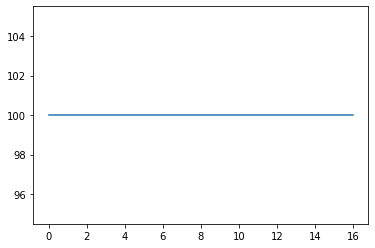

In [37]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.plot(var1)

In [38]:
import os
import cv2

In [39]:
%matplotlib inline

In [40]:
def bg_sub(filename):
    test_img_path = r'C:\Users\parth\OneDrive\Desktop\\' + filename
    main_img = cv2.imread(test_img_path)
    
    img=cv2.cvtColor(main_img, cv2.COLOR_BGR2RGB)
    #plt.imshow(img,cmap="Greys_r") 
    resized_image = cv2.resize(img, (1600, 1200))
    #plt.imshow(resized_image,cmap="Greys_r")
    y,x,_ = img.shape 
    gs = cv2.cvtColor(resized_image,cv2.COLOR_RGB2GRAY)
    #plt.imshow(gs,cmap="Greys_r")
    blur = cv2.GaussianBlur(gs, (55,55),0)
    #plt.imshow(blur,cmap="Greys_r")
    ret_otsu,im_bw_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    #plt.imshow(im_bw_otsu,cmap='Greys_r')
    kernel = np.ones((50,50),np.uint8)
    closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)
    #plt.imshow(closing,cmap="Greys_r")
    contours, hierarchy = cv2.findContours(closing,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    def find_contour(cnts):
        contains = []
        y_ri,x_ri, _ = resized_image.shape
        for cc in cnts:
            yn = cv2.pointPolygonTest(cc,(x_ri//2,y_ri//2),False)
            contains.append(yn)

        val = [contains.index(temp) for temp in contains if temp>0]
        print(contains)
        return val[0]
    black_img = np.empty([1200,1600,3],dtype=np.uint8)
    black_img.fill(0)
    #plt.imshow(black_img,cmap="Greys_r")
    index = find_contour(contours)
    cnt = contours[index]
    mask = cv2.drawContours(black_img, [cnt] , 0, (255,255,255), -1)
    #plt.imshow(mask)
    maskedImg = cv2.bitwise_and(resized_image, mask)
    white_pix = [255,255,255]
    black_pix = [0,0,0]
    final_img = maskedImg
    h,w,channels = final_img.shape
    for x in range(0,w):
        for y in range(0,h):
            channels_xy = final_img[y,x]
            if all(channels_xy == black_pix):    
                final_img[y,x] = white_pix
    return final_img


In [77]:
filename = 'mango2.jpg' 
bg_rem_img = bg_sub(filename)

[1.0]


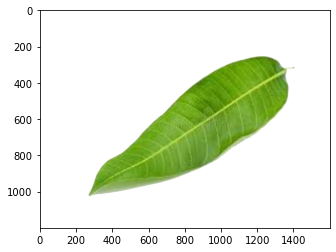

In [121]:
plt.imshow(bg_rem_img);

In [79]:
import mahotas as mt

In [80]:
def feature_extract(main_img):
    names = ['area','perimeter','physiological_length','physiological_width','aspect_ratio','rectangularity','circularity', \
             'mean_r','mean_g','mean_b','stddev_r','stddev_g','stddev_b', \
             'contrast','correlation','inverse_difference_moments','entropy'
            ]
    df = pd.DataFrame([], columns=names)

#     #Preprocessing
#     gs = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
#     blur = cv2.GaussianBlur(gs, (25,25),0)
#     ret_otsu,im_bw_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
#     kernel = np.ones((50,50),np.uint8)
#     closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)

#     #Shape features
#     image, contours = cv2.findContours(closing,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
#     cnt = contours[0]
#     M = cv2.moments(cnt)
#     area = cv2.contourArea(cnt)
#     perimeter = cv2.arcLength(cnt,True)
#     x,y,w,h = cv2.boundingRect(cnt)
#     aspect_ratio = float(w)/h
#     rectangularity = w*h/area
#     circularity = ((perimeter)**2)/area

#     #Color features
#     red_channel = img[:,:,0]
#     green_channel = img[:,:,1]
#     blue_channel = img[:,:,2]
#     blue_channel[blue_channel == 255] = 0
#     green_channel[green_channel == 255] = 0
#     red_channel[red_channel == 255] = 0

#     red_mean = np.mean(red_channel)
#     green_mean = np.mean(green_channel)
#     blue_mean = np.mean(blue_channel)

#     red_std = np.std(red_channel)
#     green_std = np.std(green_channel)
#     blue_std = np.std(blue_channel)

#     #Texture features
#     textures = mt.features.haralick(gs)
#     ht_mean = textures.mean(axis=0)
#     contrast = ht_mean[1]
#     correlation = ht_mean[2]
#     inverse_diff_moments = ht_mean[4]
#     entropy = ht_mean[8]

#     vector = [area,perimeter,w,h,aspect_ratio,rectangularity,circularity,\
#               red_mean,green_mean,blue_mean,red_std,green_std,blue_std,\
#               contrast,correlation,inverse_diff_moments,entropy
#              ]

#     df_temp = pd.DataFrame([vector],columns=names)
#     df = df.append(df_temp)
    
#     return df

#Preprocessing
    img = cv2.cvtColor(main_img, cv2.COLOR_BGR2RGB)
    gs = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gs, (25,25),0)
    ret_otsu,im_bw_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    kernel = np.ones((50,50),np.uint8)
    closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)

    #Shape features
    contours, hierarchy = cv2.findContours(closing,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    cnt = contours[0]
    M = cv2.moments(cnt)
    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt,True)
    x,y,w,h = cv2.boundingRect(cnt)
    aspect_ratio = float(w)/h
    rectangularity = w*h/area
    circularity = ((perimeter)**2)/area

    #Color features
    red_channel = img[:,:,0]
    green_channel = img[:,:,1]
    blue_channel = img[:,:,2]
    blue_channel[blue_channel == 255] = 0
    green_channel[green_channel == 255] = 0
    red_channel[red_channel == 255] = 0

    red_mean = np.mean(red_channel)
    green_mean = np.mean(green_channel)
    blue_mean = np.mean(blue_channel)

    red_std = np.std(red_channel)
    green_std = np.std(green_channel)
    blue_std = np.std(blue_channel)

    #Texture features
    textures = mt.features.haralick(gs)
    ht_mean = textures.mean(axis=0)
    contrast = ht_mean[1]
    correlation = ht_mean[2]
    inverse_diff_moments = ht_mean[4]
    entropy = ht_mean[8]

    vector = [area,perimeter,w,h,aspect_ratio,rectangularity,circularity,\
              red_mean,green_mean,blue_mean,red_std,green_std,blue_std,\
              contrast,correlation,inverse_diff_moments,entropy
             ]

    df_temp = pd.DataFrame([vector],columns=names)
    df = df.append(df_temp)
    
    return df

In [81]:
features_of_img = feature_extract(bg_rem_img)
features_of_img

C:\Users\parth\AppData\Local\Temp\ipykernel_14080\2314833299.py:109: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_temp)


,area,perimeter,physiological_length,physiological_width,aspect_ratio,rectangularity,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,inverse_difference_moments,entropy
0,376087.0,2994.110072,1098,765,1.435294,2.233446,23.836759,8.778395,32.994991,23.030005,22.612047,66.319128,47.007835,7.658196,0.998676,0.891211,2.640822


In [83]:
scaled_features = sc_X.transform(features_of_img)
print(scaled_features)
# y_pred_mobile = svm_clf.predict(features_of_img)
y_pred_mobile = svm_clf.predict(scaled_features)
y_pred_mobile[0]

[[-1.17260374 -0.56282963 -0.03074255 -0.71633807  0.28490414  0.61590081
   0.47803745 -1.82156233 -0.29076407  0.50347588 -2.57681773  1.43328262
   2.12206082 -1.06782387  0.90143159  1.68121792 -1.46867856]]


16

In [84]:
common_names=['Alpinia Galanga (Rasna)','Amaranthus Viridis (Arive-Dantu)','Artocarpus Heterophyllus (Jackfruit)','Azadirachta Indica (Neem)','Basella Alba (Basale)','Brassica Juncea (Indian Mustard)','Carissa Carandas (Karanda)','Citrus Limon (Lemon)','Ficus Auriculata (Roxburgh fig)','Ficus Religiosa (Peepal Tree)','Hibiscus Rosa-sinensis','Jasminum (Jasmine)','Mangifera Indica (Mango)','Mentha (Mint)','Moringa Oleifera (Drumstick)','Muntingia Calabura (Jamaica Cherry-Gasagase)','Murraya Koenigii (Curry)','Nerium Oleander (Oleander)','Nyctanthes Arbor-tristis (Parijata)','Ocimum Tenuiflorum (Tulsi)','Piper Betle (Betel)','Plectranthus Amboinicus (Mexican Mint)','Pongamia Pinnata (Indian Beech)','Psidium Guajava (Guava)','Punica Granatum (Pomegranate)','Santalum Album (Sandalwood)','Syzygium Cumini (Jamun)','Syzygium Jambos (Rose Apple)','Tabernaemontana Divaricata (Crape Jasmine)','Trigonella Foenum-graecum (Fenugreek)']
common_names[y_pred_mobile[0]]

'Murraya Koenigii (Curry)'